This is my first project in kaggle, I am predicting customers' survival given features.

Here I will perform exploratory data analysis, data cleaning and feature engineering. 

After data preprocessing, I will try several machine learning methods including Logistic Regression, Decision Tree, SVM,
KNN and Random Forest

In [83]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

**<font size=5>Loading data</font>**

In [84]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [85]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
train.shape

(891, 12)

As one can see, there are 891 training rows and 12 columns in the training data, which indicates 891 training samples with 10 features, 1 response column and 1 column for passenger's ID.

**<font size=5>Exploratory data analysis</font>**

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


So in these features, 'Name', 'Sex', 'Ticket', 'Cabin' and 'Embarked' are object variables, while 'Age', 'Cabin' and 'Embarked' contain missing values.

In [88]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


To plot how many passengers survived and not

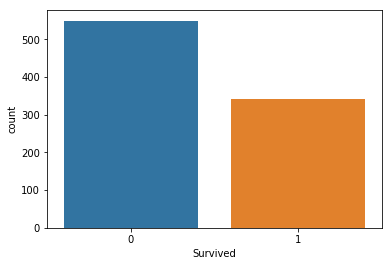

In [89]:
sns.countplot(train.Survived)

In [90]:
survived_rate = len(train.loc[train['Survived'] == 1])/len(train)

print('Survived passengers:' '%.2f%%' % float(100 * survived_rate))
print('Passengers past away:' '%.2f%%' % float(100 * (1-survived_rate)))

Survived passengers:38.38%
Passengers past away:61.62%


So more than a half died in the disaster.

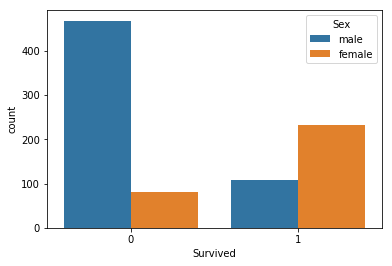

In [91]:
sns.countplot(x='Survived', hue='Sex', data=train)

Obviously, female are more likely to survive than male which shows the importance of 'Sex' variable.

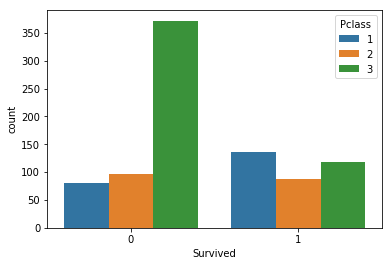

In [92]:
sns.countplot(x='Survived', hue='Pclass', data=train)

The ticket class variable is not strongly related to suvival, but one can see that most customers held third class ticket, so a lot of whom having class 3 ticket died.

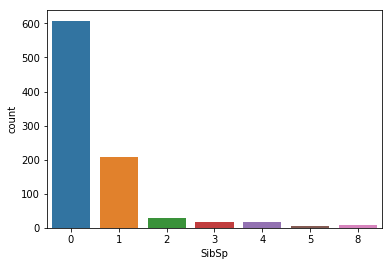

In [93]:
sns.countplot(train.SibSp)

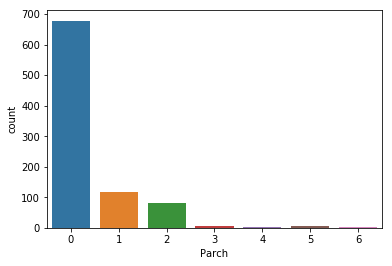

In [94]:
sns.countplot(train.Parch)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


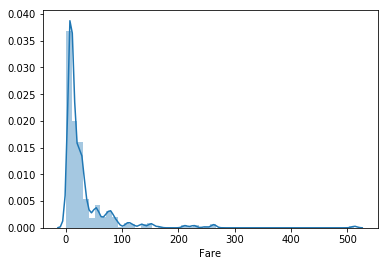

In [95]:
sns.distplot(train.Fare)

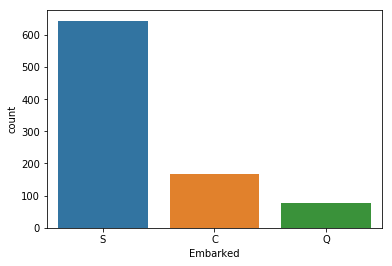

In [96]:
sns.countplot(train.Embarked)

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


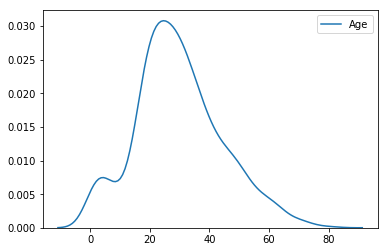

In [97]:
sns.kdeplot(train.Age)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


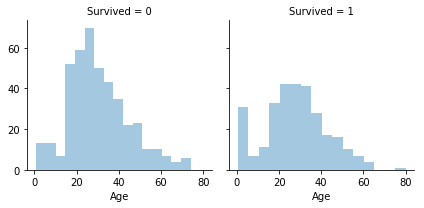

In [98]:
g=sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

So, most passengers are young, about 30 years old.
And one thing here is children with age around 0 is likely to survive.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


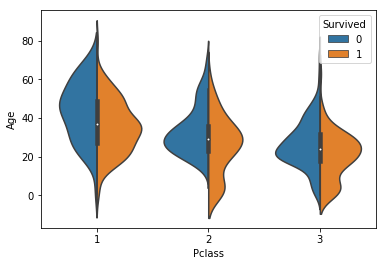

In [99]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train, split=True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


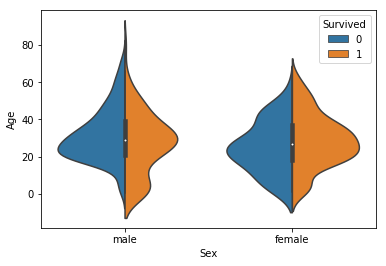

In [100]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, split=True)

So passengers are more likely to survive if they are around 30 to 40, and survived boys are more than girls.

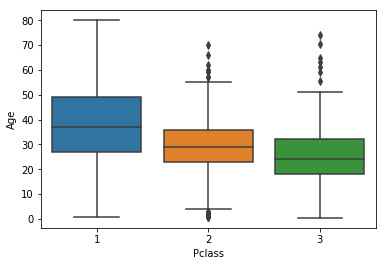

In [101]:
sns.boxplot(x='Pclass', y='Age', data=train)

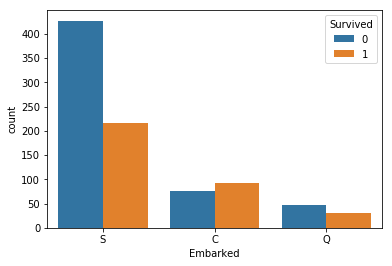

In [102]:
sns.countplot(x='Embarked', hue='Survived', data=train)

So, where people are on board is a little bit related to survival, those who get on at C have survival rate more than a half.

In [103]:
train_y = train.Survived
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_X = train[features]
test_X = test[features]

Because 'Cabin' has too many missing values, I just drop this column and 'Name' as well.

As I talked above, the relationship between 'Age' and response is affected by 'Pclass', 'Sex' and 'Embarked'. 
To impute the 'Age' variable, I will group the data according to these three features and take the median in those groups.

In [104]:
train_X_plus = train_X.copy()
test_X_plus = test_X.copy()
train_X_plus['Age_was_missing'] = train_X_plus['Age'].isnull()
test_X_plus['Age_was_missing'] = test_X_plus['Age'].isnull()

train_X_plus.loc[train_X_plus.Embarked.isna(), 'Embarked'] = 'S'
test_X_plus.loc[test_X_plus.Embarked.isna(), 'Embarked'] = 'S'

age_to_fill = train_X_plus.groupby(['Pclass', 'Sex', 'Embarked'])[['Age']].median()
for cl in range(1, 4):
    for sex in ['male', 'female']:
        for E in ['C', 'Q', 'S']:
            filll = pd.to_numeric(age_to_fill.xs(cl).xs(sex).xs(E).Age)
            train_X_plus.loc[(train_X_plus.Age.isna() & (train_X_plus.Pclass == cl) & (train_X_plus.Sex == sex)
                    & (train_X_plus.Embarked == E)), 'Age'] =filll
            test_X_plus.loc[(test_X_plus.Age.isna() & (test_X_plus.Pclass == cl) & (test_X_plus.Sex == sex)
                    & (test_X_plus.Embarked == E)), 'Age'] =filll


Then I transform the 'Sex' variable into numbers.

In [105]:
label_train_X = train_X_plus.copy()
label_test_X = test_X_plus.copy()
label_encoder = LabelEncoder()
label_train_X['Sex'] = label_encoder.fit_transform(train_X_plus['Sex'])
label_test_X['Sex'] = label_encoder.transform(test_X_plus['Sex'])

For 'Pclass' and 'Embarked', I will not just present them in ordinal, I am creating new columns indicating which class each sample belongs to.

In [106]:
object_cols = ['Pclass', 'Embarked']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(label_train_X[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(label_test_X[object_cols]))
OH_cols_train.index = label_train_X.index
OH_cols_test.index = label_test_X.index
num_train_X = label_train_X.drop(object_cols, axis=1)
num_test_X = label_test_X.drop(object_cols, axis=1)
train_X = pd.concat([num_train_X, OH_cols_train], axis=1)
test_X = pd.concat([num_test_X, OH_cols_test], axis=1)

In [107]:
train_X.head()

,Sex,Age,SibSp,Parch,Fare,Age_was_missing,0,1,2,3,4,5
0,1,22.0,1,0,7.2500,False,0.0,0.0,1.0,0.0,0.0,1.0
1,0,38.0,1,0,71.2833,False,1.0,0.0,0.0,1.0,0.0,0.0
2,0,26.0,0,0,7.9250,False,0.0,0.0,1.0,0.0,0.0,1.0
3,0,35.0,1,0,53.1000,False,1.0,0.0,0.0,0.0,0.0,1.0
4,1,35.0,0,0,8.0500,False,0.0,0.0,1.0,0.0,0.0,1.0


**<font size=5>Statistical modeling</font>**

Starting with Logistic Regression

In [108]:
classifier = LogisticRegression(solver='liblinear', random_state=0)
classifier.fit(train_X, train_y)
print(cross_val_score(classifier, train_X, train_y, cv=5).mean())

0.8002867592481275


Support Vector Machine

In [109]:
classifier = SVC(kernel='poly',gamma=0.1,C=0.1,degree=3)
classifier.fit(train_X, train_y)
print(cross_val_score(classifier, train_X, train_y, cv=5).mean())

0.7734335962255304


Decision Tree

In [110]:
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(train_X, train_y)
print(cross_val_score(classifier, train_X, train_y, cv=5).mean())

0.7823338429462934


K Nearest Neighbor

In [111]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(train_X, train_y)
print(cross_val_score(classifier, train_X, train_y, cv=5).mean())

0.7027085024507171


Random Forest

In [112]:
classifier = RandomForestClassifier(n_estimators=350, max_features=7, max_depth=9, random_state=0)
classifier.fit(train_X, train_y)
print(cross_val_score(classifier, train_X, train_y, cv=5).mean())

0.8395752941622895


So, Random Forest is the best methods among all I have tried.

**<font size=5>Submission</font>**

In [113]:
import numpy as np
test_copy = np.array(test_X.isnull())
sum(test_copy)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

As on can see, there is one missing value in the 'Fare' column of test data. So I will impute that one with fare most frequently occured.

In [114]:
my_imputer = SimpleImputer(strategy='most_frequent')
test_X = pd.DataFrame(my_imputer.fit_transform(test_X))
test_copy = np.array(test_X.isnull())
sum(test_copy)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [115]:
classifier_test = RandomForestClassifier(n_estimators=350, max_features=7, max_depth=9, random_state=0)
classifier_test.fit(train_X, train_y)
pred = classifier_test.predict(test_X)
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = pred
submission.to_csv('submission.csv')
